# 3. Matplotlib

While *seaborn* generates good-looking figures out of the box, most of the time we need to introduce some adjustments. You saw already in the previous chapters that we were relabeling axes and adjusting their range or ticks. In order to do all of this customization, we rely on calling `matplotlib` functions directly. Here, we will review some basic concepts of matplotlib figures and see how to adjust their certain elements to our liking.

Two most important concepts to be aware of when using `matplotlib` are the **figure** and **axes** objects:

 - **axes** (also referred to as subplots): the area where we plot the data; has an x- and y-axis which contain ticks, tick locations, labels and other elements
 - **figure**: the overall window/page where everything is drawn on; can contain multiple axes (subplots) organized in a form of a grid
 
**Before you begin**: Be sure to check out the official matplotlib cheat sheet (available [here](https://matplotlib.org/cheatsheets/cheatsheets.pdf)) - it outlines all of the most useful functionalities discussed below and more!

###### Set up

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 3.1 Creating figures and subplots

Let's see now how to create a figure and its axes. Note: the following examples don't have any data shown on the (sub)plots - this is to only show you how to create and refer to figures with one or more axes.

Documentation you might want to check for further information:
 - [tutorial on creating multiple sublots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

###### 3.1.1 One Subplot

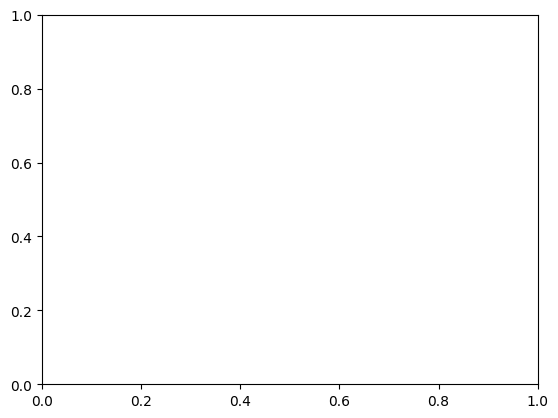

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1)

###### 3.1.2 Many Subplots - Horizontal Layout

We can create multiple subplots by using the function `subplot` of *pyplot*  module in *matplotlib*. Here we specify the size of the figure by passing a tuple in the form `(width, height)` to the `figsize` parameter. In addition, the `nrows` and `ncols` specify how many rows and  how many columns should the figure have.

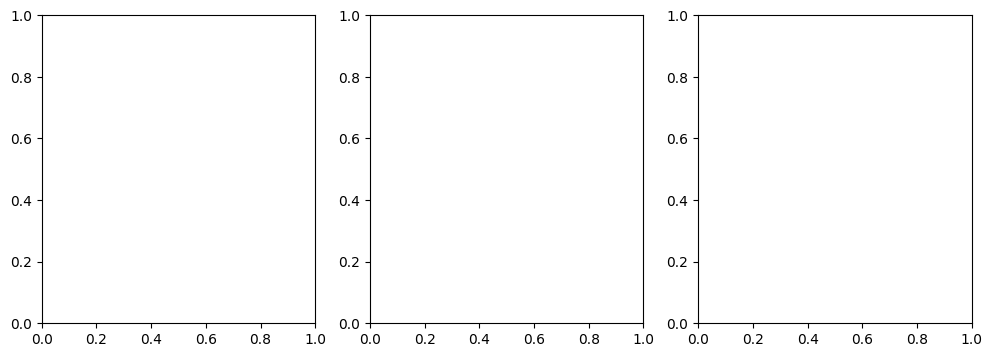

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

###### 3.1.3 Multiple Subplots - Grid Layout

Here we can see an example where instead of specifying the width and height of the figure we specify the aspect ratio by specifying `figsize = plt.figaspect(aspect_ratio)`.

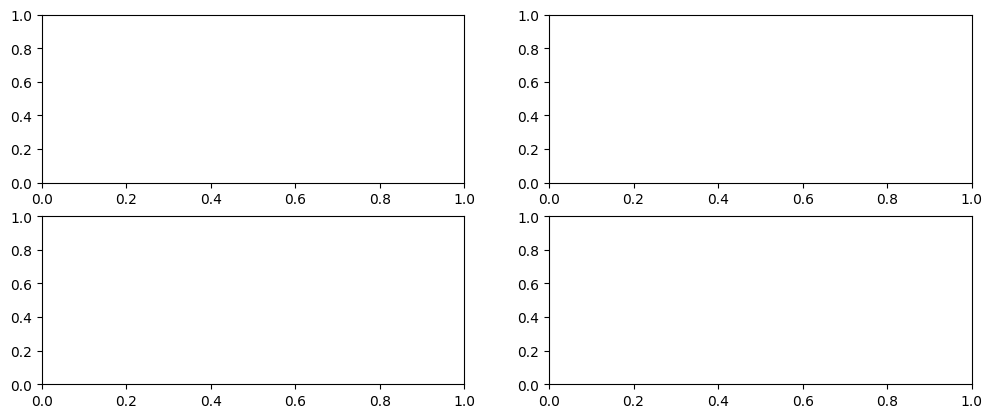

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=plt.figaspect(0.4))

###### 3.1.4 Gridspec

Sometimes we may need a grid of plots where some subplots should span multiple rows or columns. The code below shows how to do this using a `gridspec`. Below there are two examples: a vertical and a horizontal alignment. After creating the `Gridspec` object (line 3), we remove the subplots corresponding to the location of the subplot that will span some rows and some columns. The removal is done by specifying the correct rows and columns in the `for` loop (line 4). Then, we need to add the subplot in the place of the removed subplots. We do this using the function `fig.add_subplot(gs[rows, columns])`, where `gs` is the Gridspace object created at the beginning. Note that `rows` and `columns` passed to the `gs` should correspond to the locations of the axes that we removed in the `for` loop. With the `annotate` method we add the text to the subplot that spans some rows/columns and then we simply show the plot using the function `plt.show()`.

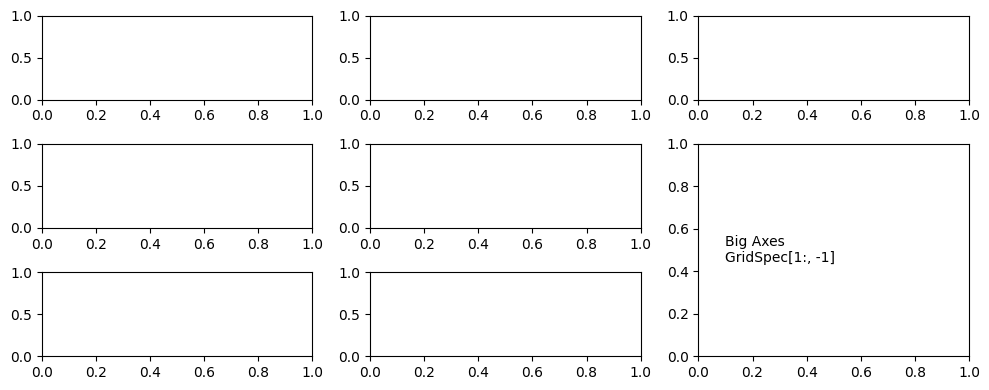

In [29]:
# Vertical alignment
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10, 4))

#gridspec object starting at row 1 column 2
gs = axes[1, 2].get_gridspec()

for ax in axes[1:, -1]:
    ax.remove()
big_ax = fig.add_subplot(gs[1:, -1])
big_ax.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig.tight_layout()

plt.show()

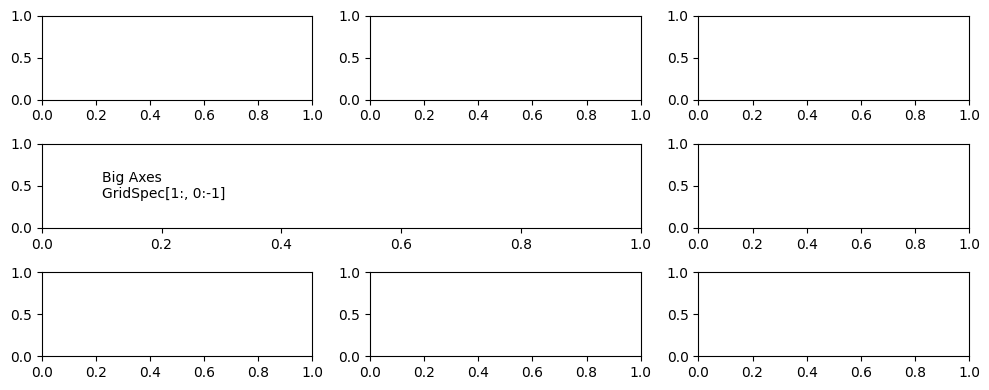

In [30]:
# Horizontal alignment
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10,4))

#gridspec object starting at row 1 column 2
gs = axes[1, 2].get_gridspec()

for ax in axes[1, 0:-1]:
    ax.remove()
ax_big = fig.add_subplot(gs[1, 0:-1])
ax_big.annotate('Big Axes \nGridSpec[1:, 0:-1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig.tight_layout()

plt.show()

## 3.2 Adding data to specific subplots

When you use seaborn, it will automatically create axes and figures for you so you don't need to do any of the above. However, when you want to have better control over your plots you may want to first create your own figure with the desired properties and then place specific plots in its axes. Below we create the plots using some data we create here:

In [9]:
x = np.arange(0.1, 4, 0.1)
df = pd.DataFrame({
    'x': x,
    'y1': np.exp(-1.0 * x),
    'y2': np.exp(-0.5 * x)
})

###### 3.2.1 A single plot

As you can see from the code below, we can create a figure and the corresponding axes and then we connect the **seaborn** plot with the figure and axes created via the `ax` parameter inside the plot method of the **seaborn** library.

<AxesSubplot: xlabel='x', ylabel='y1'>

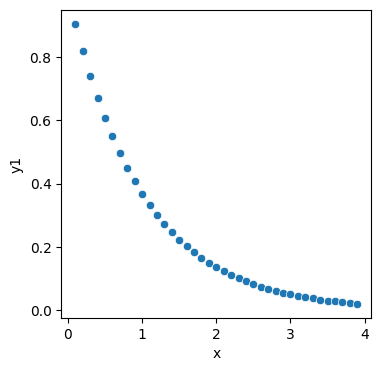

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
sns.scatterplot(data=df, x='x', y='y1', ax=axes)

###### 3.2.2 Multiple plots

When plotting more than one subplot, `axes` becomes a numpy array with a shape `(nrows, ncols)`. In this case, we need to select which subplot you want to use and pass this one to the plotting function.

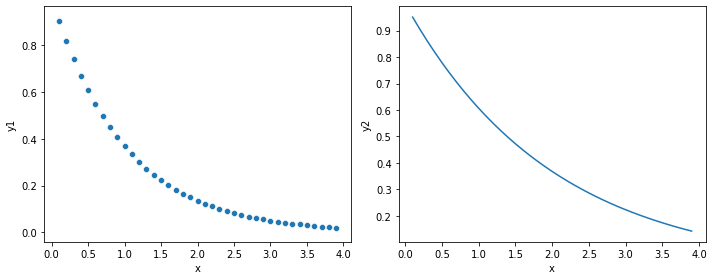

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(data=df, x='x', y='y1', ax=axes[0])
sns.lineplot(data=df, x='x', y='y2', ax=axes[1])

fig.tight_layout()

Below is an example when axes is a 2D array.

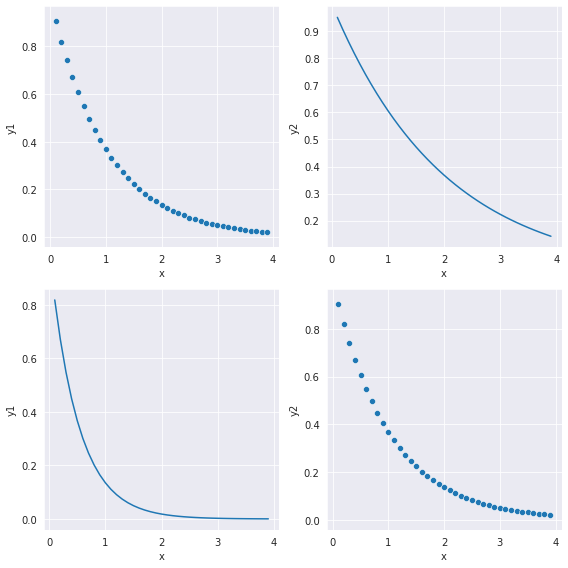

In [10]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    sns.scatterplot(data=df, x='x', y='y1', ax=axes[0, 0])
    sns.lineplot(data=df, x='x', y='y2', ax=axes[0, 1])
    sns.lineplot(x=df['x'], y=df['y1']**2, ax=axes[1, 0])
    sns.scatterplot(x=df['x'], y=df['y2']**2, ax=axes[1, 1])

fig.tight_layout()

## 3.3 Modifying elements of a plot

As you could see so far, we often need to adjust certain elements of a plot. Most of the attributes that we are usually interested in can be modified directly on the *Axes* object (the one that you passed to or received from a *seaborn* plotting function). Adjustments that concern e.g. how subplots relate to one another (like spacing between them) or other ones that have to do with the figure itself (like a figure title) can be set on the *Figure* object directly.

###### 3.3.1 Axes' labels and title

Documentation you might want to check for further information:
 - [axes labels](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)
 - [axes title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html)

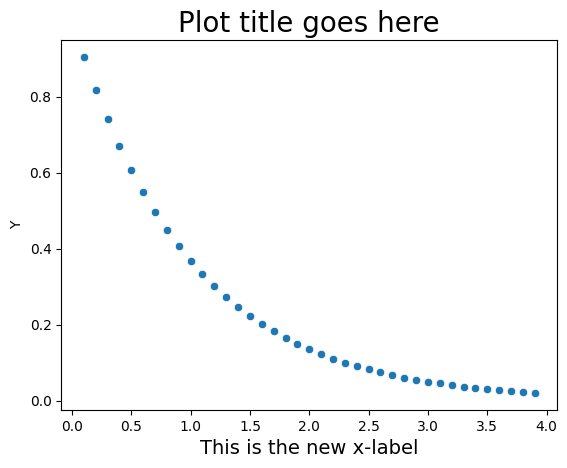

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='x', y='y1', ax=ax)
ax.set_xlabel('This is the new x-label', fontsize=14)
ax.set_ylabel('Y')
ax.set_title('Plot title goes here', fontsize=20);

###### 3.3.2 Axes' ranges, ticks and tick labels 

Documentation you might want to check for further information:
 - [axes range](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)
 - [ticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)
 - [tick labels](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html)
 - [other tick parameters](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)

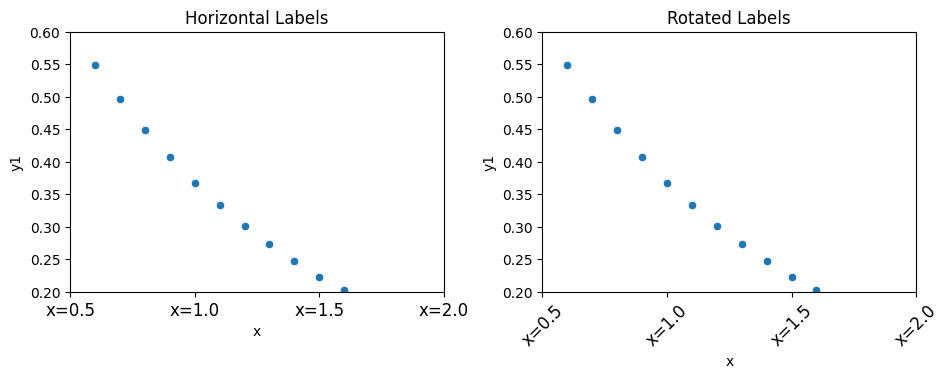

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

#adding space between subplots
plt.tight_layout(pad=4.0)

for i, ax in enumerate(axes):
    sns.scatterplot(data=df, x='x', y='y1', ax=axes[i])

    axes[i].set_xlim((0.5, 2.0))
    axes[i].set_ylim((0.2, 0.6))

    xticks = np.arange(0.5, 2.1, 0.5)
    axes[i].set_xticks(xticks)
    axes[i].tick_params(axis='x', which='major', bottom=True)
    axes[i].tick_params(axis='y', which='major', left=True)
    xtick_labels = [f'x={x}' for x in xticks]

    if i == 0:
        axes[i].set_xticklabels(xtick_labels, rotation='horizontal', fontsize=12)
        axes[i].set_title("Horizontal Labels")
    else:
        axes[i].set_xticklabels(xtick_labels, rotation=45, fontsize=12)
        axes[i].set_title("Rotated Labels")
plt.show()

###### 3.3.3 Axis' scale

Documentation you might want to refer to for further information:
 - [axis scale](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xscale.html)

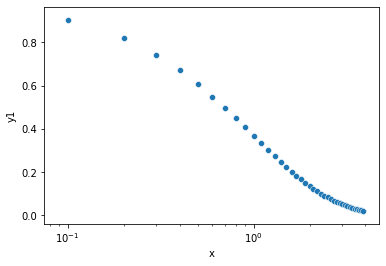

In [13]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='x', y='y1', ax=ax)

# set x-axis to logarithmic scale
ax.set_xscale('log');

###### 3.3.4 Zooming in/out in a plot

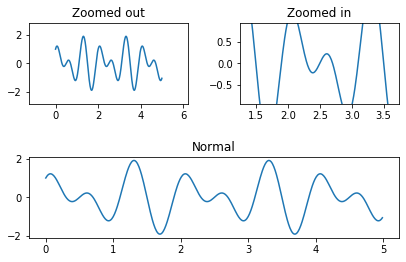

In [14]:
#define the function that will be plotted
def f(x):
    return np.sin(2*np.pi*x) + np.cos(3*np.pi*x)

x = np.arange(0.0, 5.0, 0.01)
axis1 = plt.subplot(212)
axis1.margins() # Default margin is 0.05
axis1.plot(x, f(x))
axis1.set_title('Normal')

axis2 = plt.subplot(221)
axis2.margins(0.25, 0.25) # Zoom out on both coordinates by a factor of 0.25
axis2.plot(x, f(x))
axis2.set_title('Zoomed out')

axis3 = plt.subplot(222)
axis3.margins(-0.25, -0.25)   # Zoom in on both coordinates by a factor of 0.25
axis3.plot(x, f(x))
axis3.set_title('Zoomed in')

plt.tight_layout(pad=2.0)
plt.show()

###### 3.3.5 Color Maps

Documentation you might want to check for further information:
- [seaborn's color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
- [matplotlib's color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

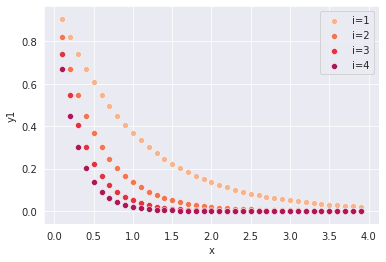

In [15]:
# we can use seaborn's built in color palettes 
# https://seaborn.pydata.org/tutorial/color_palettes.html

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    
    colors = sns.color_palette("rocket")
    for i in range(1, 5):
        sns.scatterplot(x=df['x'], y=df['y1']**i, ax=ax, label=f'i={i}', color=colors[-i])

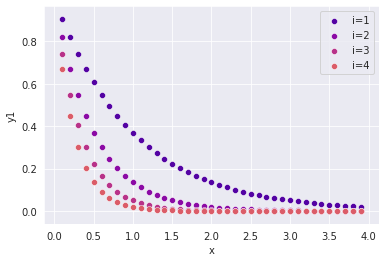

In [16]:
# alternatively, we can use matplotlib's color maps 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

from matplotlib import cm

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    
    colors = cm.get_cmap('plasma', 8).colors
    for i in range(1, 5):
        sns.scatterplot(x=df['x'], y=df['y1']**i, ax=ax, label=f'i={i}', color=colors[i])

###### 3.3.6 Legend position and title

Documentation you might want to check for further information:
- [legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

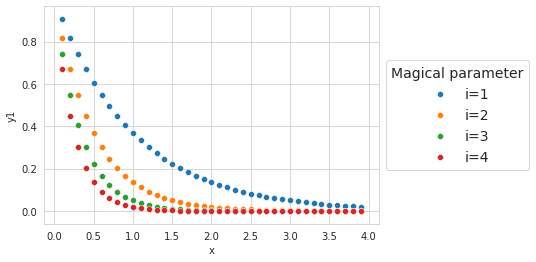

In [17]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots()
    
    for i in range(1, 5):
        sns.scatterplot(x=df['x'], y=df['y1']**i, ax=ax, label=f'i={i}')
        
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, title_fontsize=14)
    legend = ax.get_legend()
    legend.set_title('Magical parameter')

###### 3.3.7 Figure Title

Documentation you might want to check for further information:
- [figure title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html)

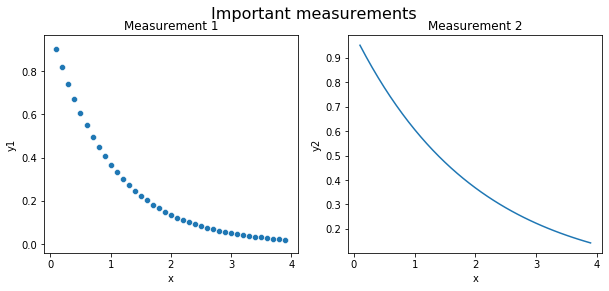

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(data=df, x='x', y='y1', ax=axes[0])
sns.lineplot(data=df, x='x', y='y2', ax=axes[1])

# we can add title to individual subplots
for i, ax in enumerate(axes):
    axes[i].set_title(f'Measurement {i+1}', fontsize=12)

# but also to the entire figure
fig.suptitle('Important measurements', fontsize=16);

###### 3.3.8 Layout of Subplots

Documentation you might want to check for further information:
- [tight layout function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html)
- [tight layout complete guide](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py)

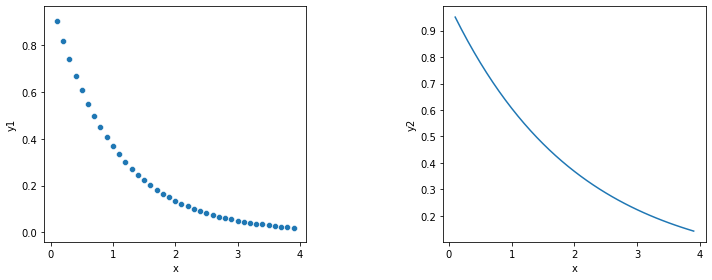

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(data=df, x='x', y='y1', ax=axes[0])
sns.lineplot(data=df, x='x', y='y2', ax=axes[1])

# we can adjust spacing between individual subplots
fig.tight_layout(w_pad=10)

###### 3.3.9 Axis label position and colorbars

Here we create a scatterplot out of a dataset with two points (1,1), (2,2). The argument `c` encodes the color of each of the points.

Documentation to check for further information:
 - [axis label position and colorbars](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_labels_demo.html)

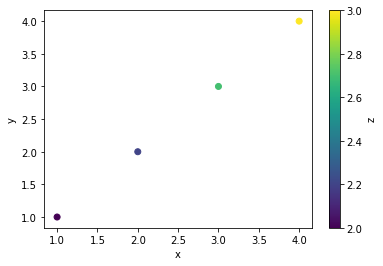

In [20]:
fig, ax = plt.subplots()

sc = ax.scatter([1, 2, 3, 4], [1, 2, 3, 4], c=[2, 2.2, 2.7, 3])
ax.set_ylabel('y')
ax.set_xlabel('x')
cbar = fig.colorbar(sc)
cbar.set_label("z")

plt.show()